# Multivariate Resemblance Analysis (MRA) Dataset B
In this notebook the multivariate resemblance analysis of Dataset B is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)


#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score


#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/B_Cardio_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/B_Cardio_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/B_Cardio_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/B_Cardio_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':           id    age gender  height  weight  ap_hi  ap_lo cholesterol gluc  \
 0      67617  21876      1     154    80.0    130     90           2    1   
 1      96320  16717      2     162    70.0    140     90           1    1   
 2      17571  21128      2     174    92.0    150    100           1    1   
 3      46492  23366      2     173    76.0    120     82           1    1   
 4        945  20281      1     160    60.0    120     80           1    1   
 ...      ...    ...    ...     ...     ...    ...    ...         ...  ...   
 55995  53137  16001      2     170    75.0    150     80           1    1   
 55996   8918  23209      2     162    73.0    160     90           1    1   
 55997  78302  23589      1     169    74.0    120     80           1    1   
 55998   1197  18227      1     167    70.0    120     80           1    1   
 55999  22556  15114      2     177    64.0    120     80           1    1   
 
       smoke alco active cardio  
 0         0    0   

## 2. Plot PPC matrixes and calculate matrixes norms

In [5]:
#compute correlation matrixes for all datasets
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])
norms_numerical

{'Real': 2.4892,
 'GM': 2.5609,
 'SDV': 2.5239,
 'CTGAN': 2.5088,
 'WGANGP': 3.3339}

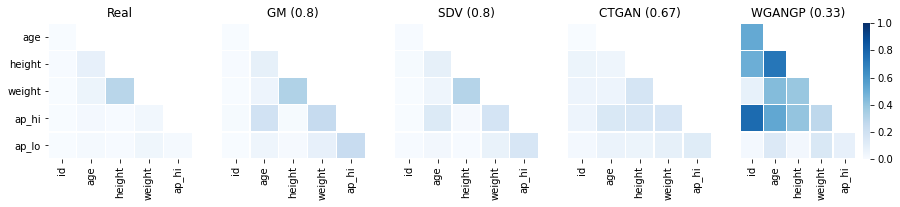

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    
    
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [7]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 1.6172, 'GM': 1.585, 'SDV': 1.4628, 'CTGAN': 2.2311, 'WGANGP': 1.4379}

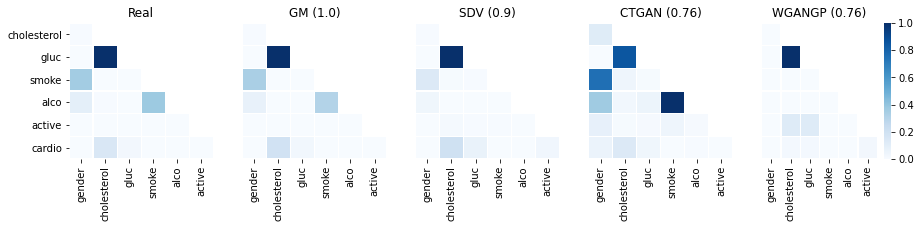

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [9]:
norms_numerical

{'Real': 2.4892,
 'GM': 2.5609,
 'SDV': 2.5239,
 'CTGAN': 2.5088,
 'WGANGP': 3.3339}

In [10]:
norms_categorical

{'Real': 1.6172, 'GM': 1.585, 'SDV': 1.4628, 'CTGAN': 2.2311, 'WGANGP': 1.4379}

In [11]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_csv('MULTIVARIATE RESEMBLANCE RESULTS/Correlation_Matrix_Norms.csv')
df_norms

,Real,GM,SDV,CTGAN,WGANGP
PPC_MATRIX_NORMS,2.4892,2.5609,2.5239,2.5088,3.3339
CATEGORICAL_CORS_MATRIX_NORMS,1.6172,1.5850,1.4628,2.2311,1.4379
